<a href="https://colab.research.google.com/github/wiemila/ML_ISE-strzykawki/blob/main/Cond_corr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [15]:
from google.colab import files
uploaded = files.upload()

Saving Dane pomidory.csv to Dane pomidory (2).csv


In [16]:
import io
data = pd.read_csv(io.BytesIO(uploaded['Dane pomidory (2).csv']),delimiter=';')

In [17]:
data

,Nazwa próbki,Kod,Rodzaj próbki,Powtórzenie,Indeks,Nazwa kodowana,DB 5,DB 4,V5,V5_2?,V1,K+ 3,K+ 5,NH4+ 3,NH4+ 2,A5-(Cl-),A-10(Cl-),pH,M
0,Daktyle,1,1,1,1,1_1,0.059854,0.057588,0.065035,0.057519,0.051446,0.078237,0.072612,0.002363,0.002831,0.040896,0.050755,5.32,0.052790
1,Daktyle,1,1,2,2,1_2,0.057857,0.056254,0.065364,0.057579,0.052227,0.078046,0.070765,0.001785,0.000054,0.042695,0.052439,5.32,0.052790
2,Daktyle,1,1,3,3,1_3,0.058485,0.055429,0.064738,0.057005,0.052502,0.076055,0.071158,-0.002705,-0.002033,0.039837,0.052399,5.32,0.052790
3,barszcz diluted 45mlH2O5ml,2,2,1,4,2_1,0.038312,0.039212,0.019193,0.011543,0.006914,0.059757,0.061617,0.018991,0.017514,-0.025790,-0.017516,4.11,0.051154
4,barszcz diluted 45mlH2O5ml,2,2,2,5,2_2,0.037089,0.036088,0.019765,0.012179,0.008509,0.058625,0.056393,0.018885,0.015818,-0.025828,-0.018449,4.11,0.051154
5,barszcz diluted 45mlH2O5ml,2,2,3,6,2_3,0.035396,0.034784,0.019934,0.012076,0.008804,0.063084,0.060339,0.023850,0.015969,-0.026117,-0.018555,4.11,0.051154
6,Tarczyn pikantny,3,3,1,7,3_1,0.040190,0.045397,0.052381,0.046022,0.042542,0.066758,0.064424,0.013696,0.013792,0.036756,0.041368,4.19,0.063942
7,Tarczyn pikantny,3,3,2,8,3_2,0.039192,0.043449,0.053069,0.046838,0.039626,0.067226,0.066602,0.015298,0.014737,0.036688,0.042073,4.19,0.063942
8,Tarczyn pikantny,3,3,3,9,3_3,0.037254,0.042032,0.052958,0.047610,0.040037,0.066217,0.065831,0.014268,0.013817,0.037570,0.042224,4.19,0.063942
9,tymbark klasyczny E190127,4,3,1,10,4_1,0.053386,0.044935,0.053164,0.046879,0.042424,0.065351,0.063011,0.014777,0.013724,0.036836,0.042851,4.31,0.063942


In [18]:
data.columns

Index(['Nazwa próbki', 'Kod', 'Rodzaj próbki', 'Powtórzenie', 'Indeks',
       'Nazwa kodowana', 'DB 5', 'DB 4 ', 'V5', 'V5_2?', 'V1', 'K+ 3', 'K+ 5',
       'NH4+ 3', 'NH4+ 2', 'A5-(Cl-)', 'A-10(Cl-)', 'pH', 'M'],
      dtype='object')

In [19]:
X_PCA_All = data[['DB 5', 'DB 4 ', 'V5', 'V5_2?', 'V1', 'K+ 3', 'K+ 5','NH4+ 3', 'NH4+ 2', 'A5-(Cl-)', 'A-10(Cl-)', 'pH']].values
X_PCA_bezpH= data[['DB 5', 'DB 4 ', 'V5', 'V5_2?', 'V1', 'K+ 3', 'K+ 5','NH4+ 3', 'NH4+ 2', 'A5-(Cl-)', 'A-10(Cl-)']].values
X_PCA_bezValipH= data[['DB 5', 'DB 4 ', 'K+ 3', 'K+ 5','NH4+ 3', 'NH4+ 2', 'A5-(Cl-)', 'A-10(Cl-)']].values
X_PCA_Val_NH4= data[['V5', 'V5_2?', 'V1','NH4+ 3', 'NH4+ 2']].values
X_PCA_Val_An= data[['V5', 'V5_2?', 'V1', 'A5-(Cl-)', 'A-10(Cl-)']].values
X_PCA_soloVal= data[['V5', 'V5_2?', 'V1']].values

In [20]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler;
scaler = preprocessing.StandardScaler().fit(X_PCA_All)
X_PCA_All_scaled = scaler.transform(X_PCA_All)

scaler = preprocessing.StandardScaler().fit(X_PCA_bezpH)
X_PCA_bezpH_scaled = scaler.transform(X_PCA_bezpH)

scaler = preprocessing.StandardScaler().fit(X_PCA_bezValipH)
X_PCA_bezValipH_scaled = scaler.transform(X_PCA_bezValipH)

scaler = preprocessing.StandardScaler().fit(X_PCA_Val_NH4)
X_PCA_Val_NH4_scaled = scaler.transform(X_PCA_Val_NH4)

scaler = preprocessing.StandardScaler().fit(X_PCA_Val_An)
X_PCA_Val_An_scaled = scaler.transform(X_PCA_Val_An)

scaler = preprocessing.StandardScaler().fit(X_PCA_soloVal)
X_PCA_soloVal_scaled = scaler.transform(X_PCA_soloVal)

#PCA

In [83]:
pca = PCA(n_components=2)
pca.fit(X_PCA_bezpH_scaled)
x_pca = pca.transform(X_PCA_bezpH_scaled)

In [84]:
pca.explained_variance_ratio_

array([0.94213394, 0.04576507])

<ipython-input-85-64bad77820e7>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca.components_[0,:],pca.components_[1,:],cmap='Set1')


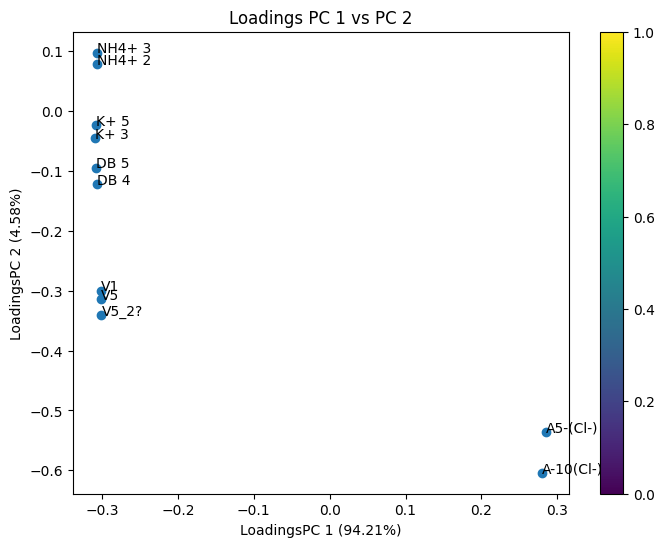

In [85]:
name = data[['DB 5', 'DB 4 ', 'V5', 'V5_2?', 'V1', 'K+ 3', 'K+ 5','NH4+ 3', 'NH4+ 2', 'A5-(Cl-)', 'A-10(Cl-)']]
plt.figure(figsize=(8,6))
plt.scatter(pca.components_[0,:],pca.components_[1,:],cmap='Set1')
plt.title('Loadings PC 1 vs PC 2')
plt.xlabel('LoadingsPC 1 (%.2f%%)' % (pca.explained_variance_ratio_[0]*100))
plt.ylabel('LoadingsPC 2 (%.2f%%)' % (pca.explained_variance_ratio_[1]*100))
for i, txt in enumerate(name):
    plt.annotate(txt, (pca.components_[0,:][i],pca.components_[1,:][i]))
plt.colorbar();

In [86]:
dfloadings = pd.DataFrame (pca.components_[0,:],pca.components_[1,:])
dfloadings

,0
-0.094867,-0.307585
-0.122494,-0.307267
-0.314670,-0.301750
-0.340337,-0.300902
-0.300030,-0.302158
-0.045806,-0.308850
-0.023566,-0.307567
0.097293,-0.306209
0.077846,-0.306999
-0.536708,0.285738


'1-dates, 2-beetroot soup, 3-tomato juice, 4-tomato passata, 5-banana juice, 6-mineral water, 7-pharmaceutical supplements'

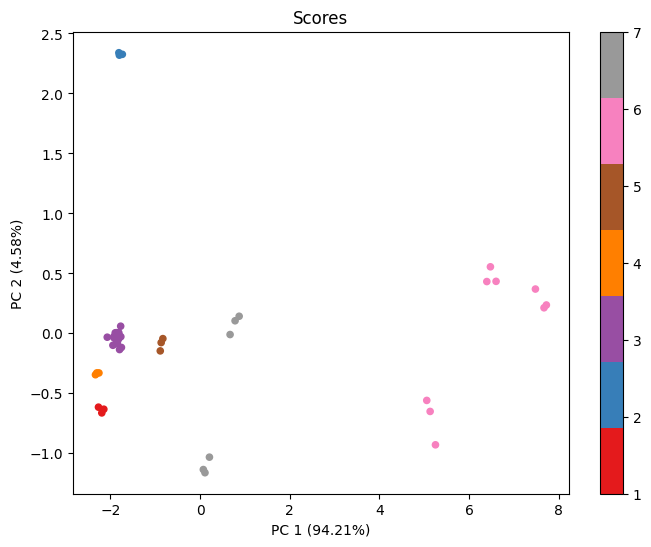

In [87]:
plt.figure(figsize=(8,6))
cmap = plt.get_cmap('Set1',7)
plt.scatter(x_pca[:,0],x_pca[:,1],cmap=cmap, c= data['Rodzaj próbki'], marker = '.',s=80)
plt.title('Scores')
plt.xlabel('PC 1 (%.2f%%)' % (pca.explained_variance_ratio_[0]*100))
plt.ylabel('PC 2 (%.2f%%)' % (pca.explained_variance_ratio_[1]*100))
plt.colorbar();
'1-dates, 2-beetroot soup, 3-tomato juice, 4-tomato passata, 5-banana juice, 6-mineral water, 7-pharmaceutical supplements'

In [88]:
dfscores = pd.DataFrame (x_pca[:,0],x_pca[:,1])
dfscores

,0
-0.614849,-2.267832
-0.662760,-2.193635
-0.631948,-2.148218
2.318818,-1.801870
2.325862,-1.735197
2.339223,-1.812679
-0.043322,-1.872349
-0.031991,-1.870901
-0.045266,-1.821528
-0.099225,-1.945992


#Regression

In [18]:
from google.colab import files
uploaded = files.upload()

Saving Dane pomidoryEJ3regression.csv to Dane pomidoryEJ3regression.csv


In [19]:
import io
dfreg = pd.read_csv(io.BytesIO(uploaded['Dane pomidoryEJ3regression.csv']),delimiter=';')

In [20]:
dfreg

,Nazwa próbki,Kod,Rodzaj próbki,Powtórzenie,Nazwa kodowana,DB 5,DB 4,V5,V5_2?,V1,K+ 3,K+ 5,NH4+ 3,A5-(Cl-),A-10(Cl-),NH4+ 2,M
0,Daktyle,1,1,1,1_1,0.059854,0.057588,0.065035,0.057519,0.051446,0.078237,0.072612,0.002363,0.040896,0.050755,0.002831,0.052790
1,Daktyle,1,1,2,1_2,0.057857,0.056254,0.065364,0.057579,0.052227,0.078046,0.070765,0.001785,0.042695,0.052439,0.000054,0.052790
2,Daktyle,1,1,3,1_3,0.058485,0.055429,0.064738,0.057005,0.052502,0.076055,0.071158,-0.002705,0.039837,0.052399,-0.002033,0.052790
3,barszcz diluted 45mlH2O5ml,2,2,1,2_1,0.038312,0.039212,0.019193,0.011543,0.006914,0.059757,0.061617,0.018991,-0.025790,-0.017516,0.017514,0.051154
4,barszcz diluted 45mlH2O5ml,2,2,2,2_2,0.037089,0.036088,0.019765,0.012179,0.008509,0.058625,0.056393,0.018885,-0.025828,-0.018449,0.015818,0.051154
5,barszcz diluted 45mlH2O5ml,2,2,3,2_3,0.035396,0.034784,0.019934,0.012076,0.008804,0.063084,0.060339,0.023850,-0.026117,-0.018555,0.015969,0.051154
6,Tarczyn pikantny,3,3,1,3_1,0.040190,0.045397,0.052381,0.046022,0.042542,0.066758,0.064424,0.013696,0.036756,0.041368,0.013792,0.063942
7,Tarczyn pikantny,3,3,2,3_2,0.039192,0.043449,0.053069,0.046838,0.039626,0.067226,0.066602,0.015298,0.036688,0.042073,0.014737,0.063942
8,Tarczyn pikantny,3,3,3,3_3,0.037254,0.042032,0.052958,0.047610,0.040037,0.066217,0.065831,0.014268,0.037570,0.042224,0.013817,0.063942
9,tymbark klasyczny E190127,4,3,1,4_1,0.053386,0.044935,0.053164,0.046879,0.042424,0.065351,0.063011,0.014777,0.036836,0.042851,0.013724,0.063942


In [23]:
y = dfreg[['M']].values
y

array([[0.05279042],
       [0.05279042],
       [0.05279042],
       [0.05115351],
       [0.05115351],
       [0.05115351],
       [0.06394189],
       [0.06394189],
       [0.06394189],
       [0.06394189],
       [0.06394189],
       [0.06394189],
       [0.06394189],
       [0.06394189],
       [0.06394189],
       [0.06394189],
       [0.06394189],
       [0.06394189],
       [0.06138421],
       [0.06138421],
       [0.06138421],
       [0.07673027],
       [0.07673027],
       [0.07673027],
       [0.03836513],
       [0.03836513],
       [0.03836513],
       [0.00019183],
       [0.00019183],
       [0.00019183],
       [0.00115863],
       [0.00115863],
       [0.00115863],
       [0.00017904],
       [0.00017904],
       [0.00017904],
       [0.01278838],
       [0.01278838],
       [0.01278838],
       [0.02532099],
       [0.02532099],
       [0.02532099],
       [0.06394189],
       [0.06394189],
       [0.06394189],
       [0.06394189],
       [0.06394189],
       [0.063

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(normX, y, test_size = 0.35)

In [61]:
X_train

,0,1,2,3,4,5,6,7,8,9,10
1,0.320924,0.312029,0.362561,0.319382,0.289694,0.432905,0.392523,0.009903,0.236822,0.290869,0.000301
29,-0.245078,-0.155613,-0.156770,-0.242455,-0.267738,-0.135599,-0.147206,-0.389573,0.462916,0.427174,-0.414830
20,0.251225,0.254669,0.355958,0.323673,0.269074,0.453786,0.428273,0.078267,0.270170,0.299858,0.098932
30,-0.156745,-0.118533,-0.108108,-0.122304,-0.126687,-0.113625,-0.113644,-0.325360,0.536335,0.603921,-0.366914
6,0.268563,0.303358,0.350025,0.307532,0.284277,0.446096,0.430500,0.091520,0.245613,0.276429,0.092160
5,0.315912,0.310446,0.177910,0.107775,0.078577,0.563022,0.538523,0.212860,-0.233097,-0.165600,0.142526
47,0.272309,0.255476,0.344556,0.303915,0.279065,0.481219,0.430202,0.092480,0.243095,0.283743,0.082559
42,0.297379,0.297683,0.366623,0.321073,0.289326,0.413347,0.425323,0.094778,0.231363,0.281434,0.090933
17,0.254597,0.270993,0.352504,0.302982,0.283770,0.470257,0.431730,0.111386,0.236883,0.287209,0.081356
33,-0.305090,-0.228492,-0.189388,-0.250459,-0.232757,-0.169156,-0.089483,-0.347750,0.483152,0.419146,-0.367788


In [62]:
X_test

,0,1,2,3,4,5,6,7,8,9,10
16,0.281658,0.279635,0.359463,0.300877,0.288002,0.446576,0.439656,0.111769,0.224207,0.277702,0.084733
41,0.122024,0.185889,0.215025,0.231124,0.137624,0.263827,0.258658,-0.151511,0.568842,0.575769,-0.131931
36,0.061993,0.142380,0.191503,0.068071,0.056493,0.325460,0.337652,-0.339404,0.441227,0.533708,-0.341662
40,0.133756,0.191225,0.227814,0.233415,0.186117,0.266949,0.270787,-0.150016,0.553635,0.552588,-0.159884
10,0.272624,0.284747,0.354887,0.317693,0.265105,0.438551,0.440647,0.099418,0.244917,0.288181,0.089597
15,0.266031,0.291494,0.362582,0.299524,0.288441,0.449312,0.429036,0.113000,0.231277,0.280135,0.095882
4,0.345541,0.336224,0.184148,0.113468,0.079276,0.546192,0.525391,0.175947,-0.240634,-0.171881,0.147371
18,0.245119,0.272478,0.370640,0.310845,0.271518,0.484360,0.411771,0.083242,0.248073,0.279190,0.085881
21,0.292030,0.322407,0.385060,0.317171,0.289422,0.413222,0.373999,0.147498,0.249163,0.259921,0.126943
2,0.327546,0.310430,0.362569,0.319259,0.294037,0.425946,0.398522,-0.015150,0.223110,0.293460,-0.011384


In [31]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=4)
pca2.fit(X_train)

PCA(n_components=4)

In [32]:
X_pca_train = pca2.transform(X_train)
X_pca_test = pca2.transform(X_test)

In [34]:
from sklearn.linear_model import LinearRegression
regressor2 = LinearRegression()
regressor2.fit(X_pca_train, y_train)

LinearRegression()

In [35]:
predictions_lr_pca = regressor2.predict(X_pca_test)

TypeError: expected 1D vector for x

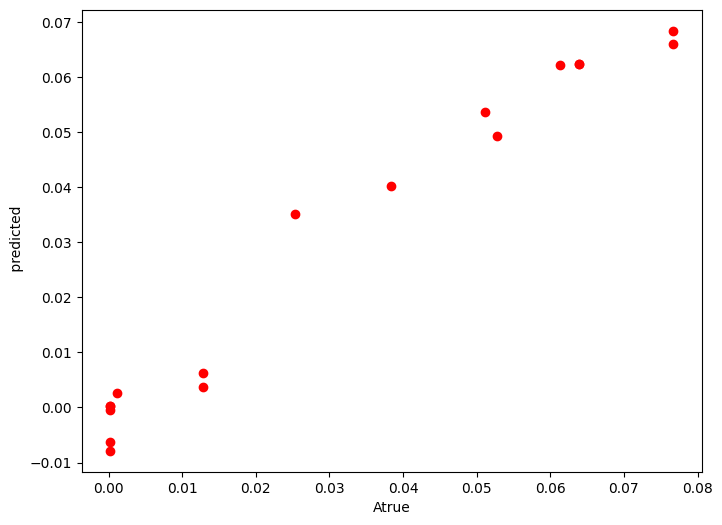

In [37]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,predictions_lr_pca,c='red')
plt.xlabel('Atrue')
plt.ylabel(' predicted')
#plot a regression line
m, b = np.polyfit(y_test,predictions_lr_pca, 1)
plt.plot(y_test, m*y_test + b)
plt.show()

In [38]:
predcopyPCR = pd.DataFrame(predictions_lr_pca)
predcopyPCR

,0
0,0.000210
1,0.066079
2,0.003762
3,0.006328
4,0.049337
5,0.053589
6,0.002630
7,0.040243
8,0.062298
9,-0.007853


In [41]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions_lr_pca))
print('MSE:', metrics.mean_squared_error(y_test, predictions_lr_pca))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_lr_pca)))

MAE: 0.004280956456962389
MSE: 3.1762698096354376e-05
RMSE: 0.005635840496000076


In [56]:
regressor2.score(X_pca_train, y_train)

0.9670529343117424

In [55]:
regressor2.score(X_pca_test, y_test)

0.9628591139892388

In [47]:
from sklearn.ensemble import RandomForestRegressor
model3=RandomForestRegressor()
model3.fit(X_pca_train, y_train)

<ipython-input-47-b4c177de85b5>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model3.fit(X_pca_train, y_train)


RandomForestRegressor()

In [48]:
model3.score(X_pca_train, y_train)

0.9915264369153751

In [52]:
model3.score(X_pca_test, y_test)

0.9741291249103162

In [49]:
predictions_rfreg = model3.predict(X_pca_test)

In [50]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_rfreg))
print('MSE:', metrics.mean_squared_error(y_test, predictions_rfreg))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_rfreg)))

MAE: 0.00345305619335295
MSE: 2.2124641687977877e-05
RMSE: 0.00470368384226426


TypeError: expected 1D vector for x

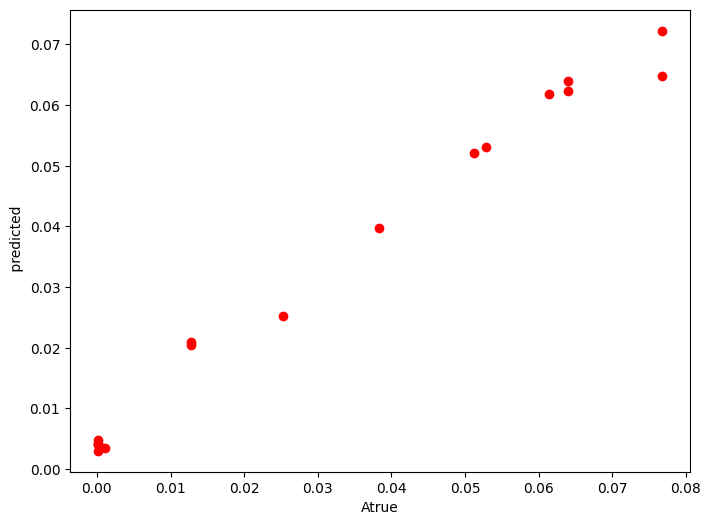

In [51]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,predictions_rfreg,c='red')
plt.xlabel('Atrue')
plt.ylabel(' predicted')
#plot a regression line
m, b = np.polyfit(y_test,predictions_rfreg, 1)
plt.plot(y_test, m*y_test + b)
plt.show()

In [57]:
predcopyRandF = pd.DataFrame(predictions_rfreg)
predcopyRandF

,0
0,0.004122
1,0.064709
2,0.020379
3,0.021009
4,0.053111
5,0.052065
6,0.003483
7,0.039781
8,0.062331
9,0.004720
